<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Настройка-среды" data-toc-modified-id="Настройка-среды-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Настройка среды</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Настройка среды

In [1]:
!pip install --no-warn-script-location -qU pandas seaborn matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set()

## Загрузка данных

In [4]:
q1 = pd.read_csv('/datasets/query_1.csv')
q1.info()
q1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
q3 = pd.read_csv('/datasets/query_3.csv')
q3.info()
q3.sample(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
26,Калининград,2.580645
55,Новый Уренгой,8.290323
16,Воронеж,2.000000
35,Курск,2.290323
73,Советский,9.000000
82,Удачный,3.000000
3,Архангельск,5.354839
71,Саранск,2.000000


### Выводы

- В данных первого запроса признак модели самолета представлен в виде строк, а признак количества рейсов за сентябрь 2018 года имеет целочисленный тип 'int64'. Данные первого запроса имеют корректные форматы.
- В данных третьего запроса названия городов представлены в виде строк, а признак среднего количества рейсов за сентябрь 2018 года в формате с плавающей точкой 'float64'. Данные третьего запроса имеют корректные форматы.
- В данных обоих запросов пропусков нет.

## Аналитика

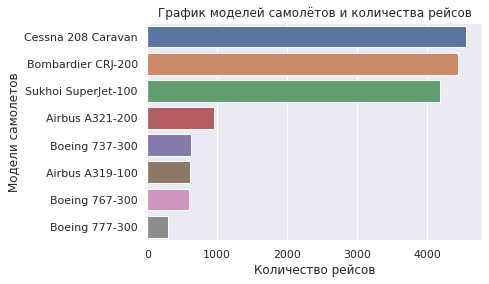

In [6]:
#График моделей самолётов и количества рейсов
ax = sns.barplot(
    data=q1.sort_values('flights_amount', ascending=False),
    x='flights_amount', 
    y='model', 
    orient='h'
)
ax.set_title("График моделей самолётов и количества рейсов")
ax.set_xlabel("Количество рейсов")
ax.set_ylabel("Модели самолетов")
print(end='')

На графике можно увидеть три модели самолетов, которые используются гораздо чаще остальных (более чем в 4 раза):
- Cessna 208 Caravan - это американский лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси. Не считая экипаж, может вмещать 9 пассажиров. Может использоваться для частных перелетов или перевозок грузов.
- Bombardier CRJ-200 - региональный самолёт, производимый канадской компанией Bombardier. Пассажировместимость 50 человек.
- Sukhoi SuperJet-100 - российский среднемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.

Предполагаю, все эти три самолета - наиболее популярные представители своего класса, отличающиеся грузоподъемностью, дальностью перелетов и пассажировместимостью.

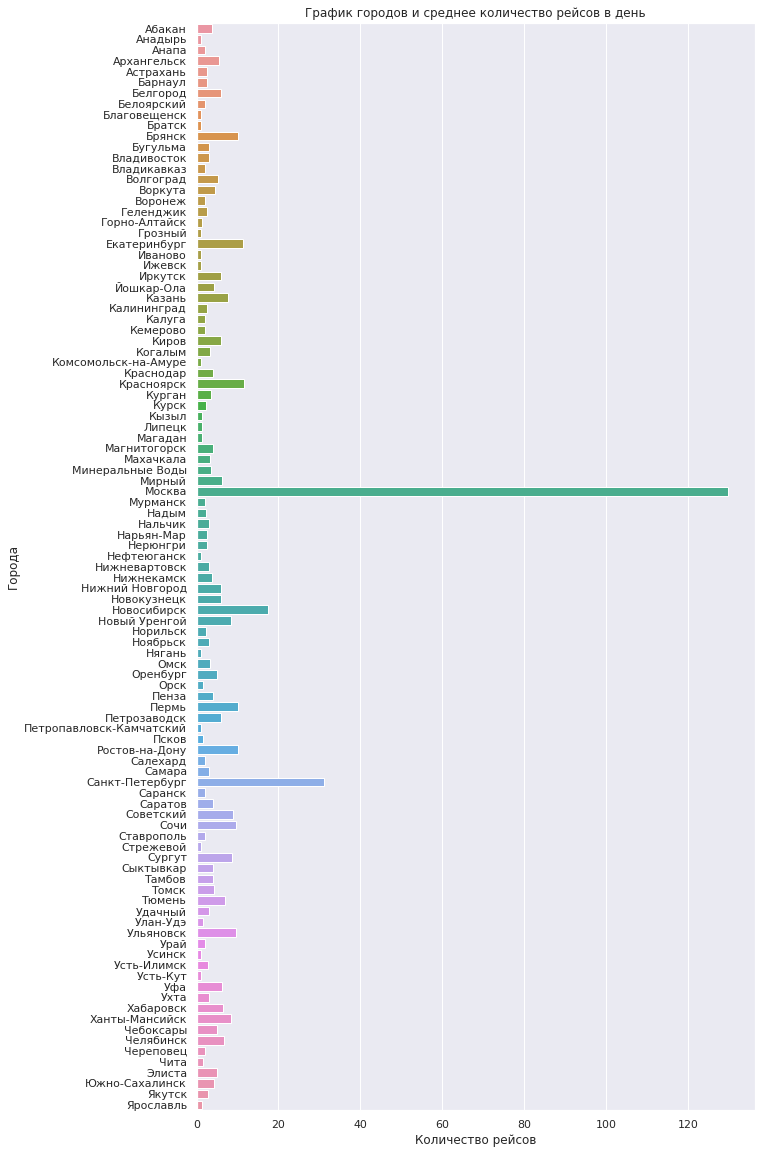

In [7]:
#График городов и сренднее количество рейсов в день
ax = sns.barplot(
    data=q3,
    x='average_flights', 
    y='city', 
    orient='h'
)
ax.set_title("График городов и среднее количество рейсов в день")
ax.set_xlabel("Количество рейсов")
ax.set_ylabel("Города")
ax.figure.set_size_inches(10, 20)
print(end='')

Средняя нагруженность аэропортов большинства городов не выходит за пределы 12 рейсов за сентябрь 2018 года. В то время как можно увидеть три выброса в районе 17 рейсов в Новосибирск, 31 рейса в Санкт-Петербург и особенно большого в районе 130 рейсов в Москву в среднем за период.

Посмотрим в какие города рейсы совершаются чаще всего. Самый большой выброс относится к столице. Составим топ-10 городов по количеству рейсов.

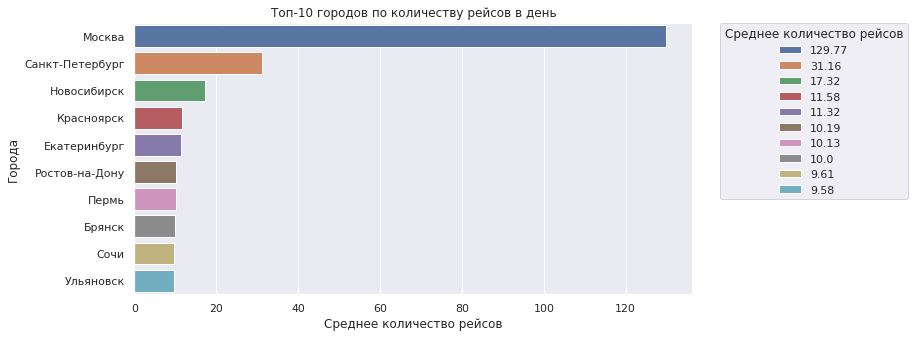

In [8]:
#График топ-10 городов по количеству рейсов в день
top10cities = q3.sort_values('average_flights', ascending=False).head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top10cities,
    x='average_flights', 
    y='city', 
    orient='h',
)
ax.set_title("Топ-10 городов по количеству рейсов в день")
ax.set_xlabel("Среднее количество рейсов")
ax.set_ylabel("Города")
ax.legend(
    handles=ax.patches, 
    labels=top10cities['average_flights'].round(decimals=2).to_list(),
    bbox_to_anchor=(1.05, 1), 
    loc=2, 
    borderaxespad=0.,
    title="Среднее количество рейсов"
)
print(end='')

Дейтвительно в среднем, за исследуемый период, большее количество рейсов направляются в Москву. На втором месте Санкт-Петербуг, на третьем крупный город Новосибирск.

Думаю такая разница возникает потому, что Москва, СПб и Новосибирск - крупные города миллионники, особенно Москва (самый крупный город РФ). А следовательно и крупные потребители и обладатели большого культурного наследия. Поэтому туда доставляют большее количество грузов и через них проходит больший трафик людей (в том числе туристов). 

## Выводы

- Данные загружены в корректном формате
- Сделаны графики моделей самолётов и количества рейсов, городов и количества рейсов, топ-10 городов и количества рейсов
- Проведен анализ данных и графиков, по результатам которого установлены наиболее популярные модели самолетов, а также составлен список топ 10 городов, в которые совершается большее количество рейсов. Обнаружено, что самые популярные самолеты отличаются по дальности перелета и пассажировместимости, а также, что в город-герой Москва за указанный период рейсов было больше на порядки, чем в другие города.